# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/listings.csv')

In [4]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20211026045247,2021-10-26,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,4.90,4.76,4.65,NaN,f,1,1,0,0,2.07
1,24480,https://www.airbnb.com/rooms/24480,20211026045247,2021-10-26,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,4.90,4.97,4.58,NaN,f,1,1,0,0,0.85
2,25026,https://www.airbnb.com/rooms/25026,20211026045247,2021-10-26,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,...,4.90,4.81,4.56,NaN,f,1,1,0,0,1.84
3,35636,https://www.airbnb.com/rooms/35636,20211026045247,2021-10-27,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,4.88,4.90,4.65,NaN,f,1,1,0,0,1.90
4,35764,https://www.airbnb.com/rooms/35764,20211026045247,2021-10-26,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,4.94,4.94,4.87,NaN,f,1,1,0,0,3.05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23359 entries, 0 to 23358
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23359 non-null  int64  
 1   listing_url                                   23359 non-null  object 
 2   scrape_id                                     23359 non-null  int64  
 3   last_scraped                                  23359 non-null  object 
 4   name                                          23338 non-null  object 
 5   description                                   22137 non-null  object 
 6   neighborhood_overview                         12726 non-null  object 
 7   picture_url                                   23359 non-null  object 
 8   host_id                                       23359 non-null  int64  
 9   host_url                                      23359 non-null 

**Creating a new dataframe with columns that will be used**

Note that we have 73 columns in the original dataset. We are not going to use all of these features. Some of them are completly empty with no data at all. And some are irrelevant for our purpose, as text data, because we are not going to use neural networks in this project.      
Let's create a new dataframe only with the columns that will be used, totaling 17 columns from the original dataset.

In [6]:
df = df[['host_is_superhost',
         'host_identity_verified',
         'neighbourhood_cleansed',
         'latitude',
         'longitude', 
         'property_type',
         'room_type',
         'accommodates',
         'bathrooms_text',
         'bedrooms', 
         'beds',
         'amenities',
         'price',
         'minimum_nights',
         'maximum_nights',
         'number_of_reviews',
         'instant_bookable',
         'reviews_per_month']]

In [7]:
df.head()

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,reviews_per_month
0,f,t,Copacabana,-22.96599,-43.17940,Entire condominium (condo),Entire home/apt,5,1 bath,2.0,2.0,"[""Air conditioning"", ""Hangers"", ""Elevator"", ""C...",$350.00,5,180,266,f,2.07
1,f,t,Ipanema,-22.98405,-43.20189,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Air conditioning"", ...",$296.00,3,90,85,f,0.85
2,f,t,Copacabana,-22.97735,-43.19105,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Essentials"", ""Kitchen"", ""TV with standard ca...",$168.00,4,90,238,f,1.84
3,t,t,Ipanema,-22.98839,-43.19232,Entire rental unit,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Air conditioning"", ""Hangers"", ""Elevator"", ""C...",$278.00,2,89,181,f,1.90
4,t,t,Copacabana,-22.98107,-43.19136,Entire loft,Entire home/apt,2,1.5 baths,1.0,1.0,"[""Room-darkening shades"", ""Air conditioning"", ...",$150.00,3,15,373,f,3.05


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23359 entries, 0 to 23358
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       23354 non-null  object 
 1   host_identity_verified  23354 non-null  object 
 2   neighbourhood_cleansed  23359 non-null  object 
 3   latitude                23359 non-null  float64
 4   longitude               23359 non-null  float64
 5   property_type           23359 non-null  object 
 6   room_type               23359 non-null  object 
 7   accommodates            23359 non-null  int64  
 8   bathrooms_text          23291 non-null  object 
 9   bedrooms                21871 non-null  float64
 10  beds                    23167 non-null  float64
 11  amenities               23359 non-null  object 
 12  price                   23359 non-null  object 
 13  minimum_nights          23359 non-null  int64  
 14  maximum_nights          23359 non-null

## Data Cleaning and Data Transformation

- Identifying and removing the anomalies in the dataset.
- Changing the data type pf the columns, creating derived columns or removing duplicate data.

### Dealing with missing data

**Checking which columns have null data (in descending order)**

In [9]:
df.isna().sum().sort_values(ascending=False)

reviews_per_month         8252
bedrooms                  1488
beds                       192
bathrooms_text              68
host_identity_verified       5
host_is_superhost            5
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
amenities                    0
price                        0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
instant_bookable             0
dtype: int64

**Missing data percentages**

In [10]:
((df.isna().sum()) * 100/23359).sort_values(ascending=False)

reviews_per_month         35.326855
bedrooms                   6.370136
beds                       0.821953
bathrooms_text             0.291108
host_identity_verified     0.021405
host_is_superhost          0.021405
neighbourhood_cleansed     0.000000
latitude                   0.000000
longitude                  0.000000
property_type              0.000000
room_type                  0.000000
accommodates               0.000000
amenities                  0.000000
price                      0.000000
minimum_nights             0.000000
maximum_nights             0.000000
number_of_reviews          0.000000
instant_bookable           0.000000
dtype: float64

**Approach to deal with missing data**

Because no column has more than 50% of the missing values, we will not delete any columns. With regard to missing lines, rather than deleting lines that do not have information, we will take an approach of trying to fill the lines with a reasonable assumption, either by statistical techniques or by a knowledge of the problem domain. 

**reviews_per_months Column**

The reviews_per_months column has approximately 35% of rows missing data. It is quite a expressive quantity.
A reasonable assumption to make is to assume that these Airbnbs never receive any reviews, so we can fill these rows with 0.

In [11]:
df['reviews_per_month'].fillna(0, inplace=True)

**bedrooms Column**

Column bedrooms has approximately 6% row missing data. We chose to use the median. Although the values in this column are of type float64, we can see that all numbers are integers. If we use the mean, we would get 1.7, a non-integer number, and since it is not possible to have 1.7 rooms, we use the median to obtain an integer value.

In [12]:
# Verifying the unique values of the column
df['bedrooms'].unique()

array([ 2.,  1.,  6.,  4.,  3., nan,  7., 10.,  5.,  9., 15., 20.,  8.,
       17., 12., 11., 13., 30., 14., 47., 18.])

In [13]:
df['bedrooms'].median()

1.0

In [14]:
df['bedrooms'].fillna((df['bedrooms'].median()), inplace=True)

**beds Column**

The missing values of beds column represents only 0.8% of the data. Although it's only a small percentage, we are going to fill in these missing values. Using the same logic for filling in the bedrooms column, we will use the median of the existing values.

In [15]:
# All the unique values are integers
df['beds'].unique()

array([ 2.,  1.,  7.,  5.,  3., 10.,  6.,  4.,  8.,  0.,  9., 16., 50.,
       nan, 14., 13., 17., 12., 15., 11., 18., 91., 24., 35., 30., 41.,
       38., 20., 22., 27., 33., 21., 26., 25., 23., 43., 52., 29., 31.])

In [16]:
df['beds'].median()

2.0

In [17]:
df['beds'].fillna((df['beds'].median()), inplace=True)

**bathrooms_text Column**

The bathroom_text column has only 0.29% of rows missing data. We're going to fill these rows with the mode, since bathroom_text can be considered a categorical feature, because its values have string type.

In [18]:
df['bathrooms_text'].unique()

array(['1 bath', '1.5 baths', '15 baths', '1 private bath', '3 baths',
       '7 baths', '4 baths', '2.5 baths', '2 baths', '5 shared baths',
       nan, '1 shared bath', '4.5 baths', '2 shared baths',
       '1.5 shared baths', '3.5 baths', '0 shared baths', '5 baths',
       '0 baths', '2.5 shared baths', '6 baths', 'Shared half-bath',
       '10 baths', '8 baths', '3 shared baths', '6.5 baths', '5.5 baths',
       '4 shared baths', '7.5 baths', 'Half-bath', '3.5 shared baths',
       '7 shared baths', '11.5 baths', '20 shared baths', '20 baths',
       '6.5 shared baths', '11 baths', '12 baths', '15.5 baths',
       '8.5 baths', '6 shared baths', 'Private half-bath', '10.5 baths',
       '13 baths', '9 baths', '4.5 shared baths', '18 baths',
       '8.5 shared baths', '50 baths', '9.5 baths', '9 shared baths',
       '8 shared baths', '5.5 shared baths'], dtype=object)

In [19]:
# Mode
df['bathrooms_text'].value_counts().index[0]

'1 bath'

In [20]:
df['bathrooms_text'].fillna(df['bathrooms_text'].value_counts().index[0], inplace=True)

**host_is_superhost Column**

This column can have only one of two values: 'f' for false and 't' for true. Let's assume that the missing values are hosts that aren't superhosts. So, let's fill it with 'f'.

In [21]:
df['host_is_superhost'].unique()

array(['f', 't', nan], dtype=object)

In [22]:
df['host_is_superhost'].fillna('f', inplace=True)

**host_identity_verified Column**

This column can also have only one of two values: 'f' for false and 't' for true. Let's make the same assumption above, and fill the missing values with 'f'.

In [23]:
df['host_identity_verified'].unique()

array(['t', 'f', nan], dtype=object)

In [24]:
df['host_identity_verified'].fillna('f', inplace=True)

### Transforming string into numeric type

**Transforming price data type**

As we can see, the price has a \\$ sign and is of string type. Being the feature that we after are going to try to predict, and a real number, we need to change its type to float. 

In [25]:
df['price'].unique()

array(['$350.00', '$296.00', '$168.00', ..., '$1,083.00', '$2,456.00',
       '$408.00'], dtype=object)

In [26]:
def convert_price_to_numeric(price):
    return float(price[1:].replace(',', ''))

In [27]:
df['price'] = df['price'].apply(convert_price_to_numeric)

In [28]:
df['price'].unique()

array([ 350.,  296.,  168., ..., 1083., 2456.,  408.])

**Transforming bathroom_text data type**

In [29]:
df['bathrooms_text'].unique()

array(['1 bath', '1.5 baths', '15 baths', '1 private bath', '3 baths',
       '7 baths', '4 baths', '2.5 baths', '2 baths', '5 shared baths',
       '1 shared bath', '4.5 baths', '2 shared baths', '1.5 shared baths',
       '3.5 baths', '0 shared baths', '5 baths', '0 baths',
       '2.5 shared baths', '6 baths', 'Shared half-bath', '10 baths',
       '8 baths', '3 shared baths', '6.5 baths', '5.5 baths',
       '4 shared baths', '7.5 baths', 'Half-bath', '3.5 shared baths',
       '7 shared baths', '11.5 baths', '20 shared baths', '20 baths',
       '6.5 shared baths', '11 baths', '12 baths', '15.5 baths',
       '8.5 baths', '6 shared baths', 'Private half-bath', '10.5 baths',
       '13 baths', '9 baths', '4.5 shared baths', '18 baths',
       '8.5 shared baths', '50 baths', '9.5 baths', '9 shared baths',
       '8 shared baths', '5.5 shared baths'], dtype=object)

Rows that have 'Shared half-bath', 'Half-bath' or 'Private half-bath' in this column, do not have a numeric value for the number of bathrooms. As they are half-baths, bathrooms without a shower, we can assume that this is represeted in the data by the value 0.5.

In [30]:
half_baths = {'Shared half-bath': '0.5 shared half-bath', 
              'Half-bath': '0.5 half-bath',
              'Private half-bath': '0.5 half-bath'}

In [31]:
df['bathrooms_text'].replace(half_baths, inplace=True)

In [32]:
df['bathrooms_text'].unique()

array(['1 bath', '1.5 baths', '15 baths', '1 private bath', '3 baths',
       '7 baths', '4 baths', '2.5 baths', '2 baths', '5 shared baths',
       '1 shared bath', '4.5 baths', '2 shared baths', '1.5 shared baths',
       '3.5 baths', '0 shared baths', '5 baths', '0 baths',
       '2.5 shared baths', '6 baths', '0.5 shared half-bath', '10 baths',
       '8 baths', '3 shared baths', '6.5 baths', '5.5 baths',
       '4 shared baths', '7.5 baths', '0.5 half-bath', '3.5 shared baths',
       '7 shared baths', '11.5 baths', '20 shared baths', '20 baths',
       '6.5 shared baths', '11 baths', '12 baths', '15.5 baths',
       '8.5 baths', '6 shared baths', '10.5 baths', '13 baths', '9 baths',
       '4.5 shared baths', '18 baths', '8.5 shared baths', '50 baths',
       '9.5 baths', '9 shared baths', '8 shared baths',
       '5.5 shared baths'], dtype=object)

Creating a numeric column with the bathroom quantity. We're not going to substitute the text information, because we're going to use it to create others columns.

In [33]:
def get_bath_qnt(bath_text):
    bath_qnt = float(bath_text.split()[0])
    return bath_qnt

In [34]:
df['bathrooms_quantity'] = df['bathrooms_text'].apply(get_bath_qnt)

### Dealing with irrealistic values

We can see above the statistical information about numeric features.

In [35]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,23359.0,-22.966059,0.035449,-23.07267,-22.984710,-22.97205,-22.95159,-22.74969
longitude,23359.0,-43.248951,0.097368,-43.69889,-43.303725,-43.19628,-43.18619,-43.10440
accommodates,23359.0,4.135537,2.486378,0.00000,2.000000,4.00000,5.00000,16.00000
bedrooms,23359.0,1.663898,1.097098,1.00000,1.000000,1.00000,2.00000,47.00000
beds,23359.0,2.555460,2.270344,0.00000,1.000000,2.00000,3.00000,91.00000
price,23359.0,729.485509,4977.724917,0.00000,160.000000,286.00000,561.00000,637760.00000
minimum_nights,23359.0,5.316152,22.583058,1.00000,1.000000,3.00000,4.00000,1000.00000
maximum_nights,23359.0,621.391241,629.911228,1.00000,31.000000,1000.00000,1125.00000,47036.00000
number_of_reviews,23359.0,14.398990,33.709045,0.00000,0.000000,2.00000,11.00000,494.00000
reviews_per_month,23359.0,0.436532,0.814783,0.00000,0.000000,0.09000,0.52000,24.35000


Looking at the min values, we have some irrealistic values that we need to treat. 

The column accommodates shows the maximum capacity of the listing. The min value for this column in the dataset is 0, but an Airbnb that doesn't have capacity for at least one person is a bit out of the question.

The column price also have the min value of 0. But as Airbnb is a payed service, we're not going to consider the places with a price per night of zero.

*How many rows with 0 we have in accommodates column?*

In [36]:
len(df[(df['accommodates'] == 0)])

7

*How many rows with 0 we have in price column?*

In [37]:
len(df[df['price'] == 0])

7

Since the number of rows with zero in the accommodates and price columns are the same, it may be that they are the same rows in both situations. Let's confirm that.

In [38]:
len(df[(df['price'] == 0) & (df['accommodates'] == 0)])

7

Now, we drop these rows.

In [39]:
df.drop(df.index[df['price']==0], inplace=True)

In [40]:
len(df[(df['accommodates'] == 0)])

0

In [41]:
len(df[df['price'] == 0])

0

### Dealing with outliers

We intend, in the last part of this project, see if we can predict the price of the airbnbs given some features. So, since some machine learning algorithms are sensitive to outliers, we are going to drop it from the dataset.

In [42]:
# Estatistical information about the price
df['price'].describe()

count     23352.000000
mean        729.704180
std        4978.454929
min          33.000000
25%         160.000000
50%         286.000000
75%         561.000000
max      637760.000000
Name: price, dtype: float64

We can see the outliers by plotting a boxplot.

<AxesSubplot:xlabel='price'>

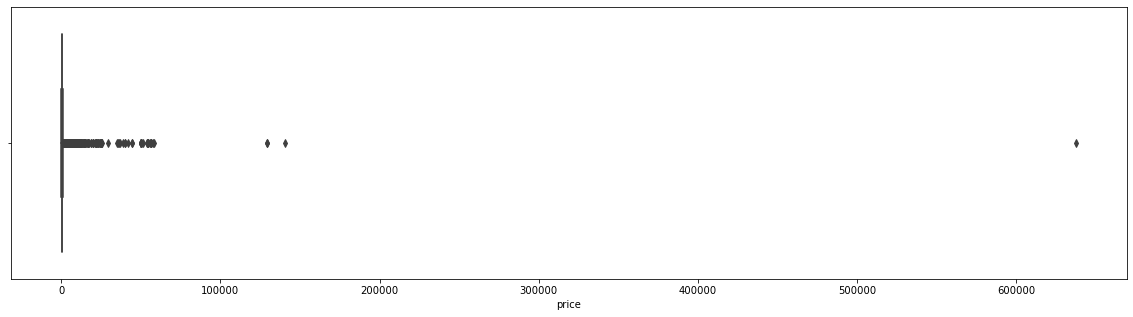

In [43]:
plt.figure(figsize=(20,5))
sns.boxplot(x='price', data=df)

As we can see, it is a lot a outliers. One in specific is completetly distant from the others. Let's take a look in that specific data point. You can imagine an Airbnb that costs \\$637760.00 per night?

In [44]:
df[df['price']==637760]

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,reviews_per_month,bathrooms_quantity
7055,f,f,São Cristóvão,-22.89993,-43.23033,Shared room in residential home,Shared room,5,1 shared bath,1.0,4.0,"[""TV"", ""Kitchen"", ""Wifi"", ""Air conditioning""]",637760.0,6,8,0,t,0.0,1.0


Let's take a closer look at where most of the datapoints are.

(0.0, 1500.0)

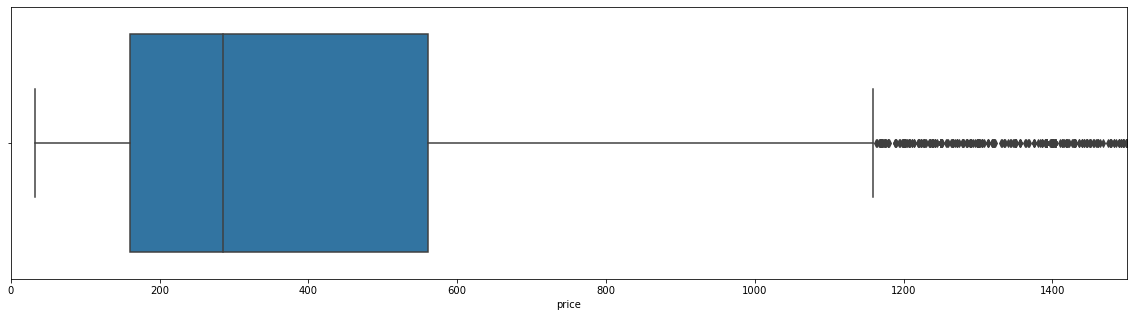

In [45]:
plt.figure(figsize=(20,5))
sns.boxplot(x='price', data=df)
plt.xlim(0,1500)

Let's create a function to calculate the interquartile range, so we can use the upper bound limit to drop the outliers.

In [46]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
         'Lower Bound':lower_bound,
         'Sum outliers': sums,
         'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)

In [47]:
outliers(df['price'])

,sub,values
0,IQR,401.000000
1,Upper Bound,1162.500000
2,Lower Bound,-441.500000
3,Sum outliers,2502.000000
4,percentage outliers,10.714286


About 10% of the data is composed of outliers, which we're going to drop.

In [48]:
upper_bound = 1162.500000

df = df[df['price'] <= upper_bound]

<AxesSubplot:xlabel='price'>

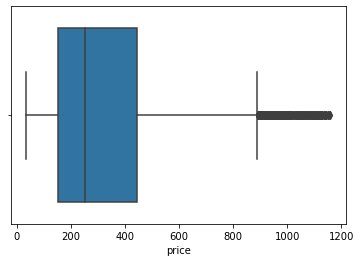

In [49]:
sns.boxplot(x='price', data=df)

In [50]:
# Total rows after drop outliers
len(df)

20850

### Creating new features

The feature amenities is a string that contains the amenities offered by the host of each Airbnb, written by the host. This information can be valuable for us, but first we need to put it in another format. 

So we took a look in the [Airbnb site](https://www.airbnb.com.br/resources/hosting-homes/a/the-best-amenities-to-offer-right-now-203?_set_bev_on_new_domain=1643122576_ZWFiMmI3MDg5OTAw#:~:text=The%20most%20popular%20amenities%20right%20now%20include%20a,Update%20your%20listing%20to%20reflect%20your%20current%20amenities) and discover which are the amenities that guests are most looking for. We end up with the following list: 
 - Wifi
 - Tv
 - Hot Water
 - Kitchen
 - Pets allowed
 - Free parking
 - Pool

We are going to look for these amenities in the text of each row, and create new features for each amenity of the list above.

In [51]:
# Putting everything in lower case to make it easier
df['amenities'] = df['amenities'].str.lower()

*Wifi feature*

In [52]:
df['wifi'] = df['amenities'].apply(lambda x: 1 if x.find('wifi') > -1 else 0)

In [53]:
df['wifi'].unique()

array([1, 0], dtype=int64)

*Tv feature*

In [54]:
df['tv'] = df['amenities'].apply(lambda x: 1 if x.find('tv') > -1 else 0)

In [55]:
df['tv'].unique()

array([1, 0], dtype=int64)

*Hot water feature*

In [56]:
df['hot_water'] = df['amenities'].apply(lambda x: 1 if x.find('hot water') > -1 else 0)

In [57]:
df['hot_water'].unique()

array([1, 0], dtype=int64)

*Kitchen feature*

In [58]:
kitchen_list = ['kitchen', 'stove', 'cozinha', 'forno', 'fogao', 'cooktop', 'stove', 'oven']

In [59]:
df['kitchen'] = df['amenities'].apply(lambda x: 1 if any(item in x for item in kitchen_list) else 0)

In [60]:
df['kitchen'].unique()

array([1, 0], dtype=int64)

*Pets allowed feature*

In [61]:
df['pets_allowed'] = df['amenities'].apply(lambda x: 1 if x.find('pets allowed') > -1 else 0)

In [62]:
df['pets_allowed'].unique()

array([0, 1], dtype=int64)

*Free parking feature*

In [63]:
df['free_parking'] = df['amenities'].apply(lambda x: 1 if x.find('free parking') > -1 else 0)

In [64]:
df['free_parking'].unique()

array([0, 1], dtype=int64)

*Pool feature*

In [65]:
df['pool'] = df['amenities'].apply(lambda x: 1 if x.find('pool') > -1 else 0)

In [66]:
df['pool'].unique()

array([0, 1], dtype=int64)

Now, we can drop amenities column

In [67]:
df = df.drop('amenities', axis=1)

**Creating bathroom_is_shared feature**

In [68]:
def is_shared(bath):
    if bath.lower().find('shared') < 0:
        return 0
    else:
        return 1

In [69]:
df['bathroom_is_shared'] = df['bathrooms_text'].apply(is_shared)

**Creating bathroom_type feature**

In [70]:
def get_bath_type(bath):
    bath_list = bath.split()[1:]
    bath_type = ''.join([f'{bath} ' for bath in bath_list])
    
    bath_type = bath_type.replace('private ', '')
    
    if bath_type[-2] == 's':
        return bath_type[:-2]
    else:
        return bath_type[:-1]

In [71]:
df['bathrooms_type'] = df['bathrooms_text'].apply(get_bath_type)

In [72]:
df['bathrooms_type'].unique()

array(['bath', 'shared bath', 'shared half-bath', 'half-bath'],
      dtype=object)

**Creating price_range feature**

In [73]:
df['price'].describe()

count    20850.000000
mean       332.415731
std        246.992169
min         33.000000
25%        150.000000
50%        250.000000
75%        445.750000
max       1159.000000
Name: price, dtype: float64

In [75]:
def price_range(price):
    if price < 100:
        return '< $100'
    elif price <= 250:
        return '$100 - $250'
    elif price <= 500:
        return '$251 - $500'
    elif price <= 750:
        return '$501 - $750'
    elif price <= 1000:
        return '$750 - $100'
    elif price > 1000:
        return '> $1000'

In [76]:
df['price_range'] = df['price'].apply(price_range)

### Saving cleaned dataset

In [78]:
df.to_csv('data/cleaned_listings.csv')